## Scrubber Discharge Project
Exploring the output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project - preliminary runs (updated March 2023)

- scenario 1: 1-year discharge for Jan 2019 - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2024
- scenario 3: 10-year discharge for Jan 2019 - Dec 2029

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Define scenario and control files

In [2]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_control/outputSalishSea.nc"
scenario2019_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2019/outputSalishSea.nc"
scenario2024_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2024/outputSalishSea.nc"
scenario2029_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_100y_2029/outputSalishSea.nc"

control      = xr.open_dataset(str(control_file), decode_cf=True)
scenario2019 = xr.open_dataset(str(scenario2019_file), decode_cf=True)
scenario2024 = xr.open_dataset(str(scenario2024_file), decode_cf=True)
scenario2029 = xr.open_dataset(str(scenario2029_file), decode_cf=True)

time = np.ma.filled(scenario2019.variables['t'], np.nan)

In [3]:
#t_corrected = t - np.timedelta64(578, 'D')

start = 40 #112
end =  120 #t.size-1

event_start = np.datetime64('2019-08-01')

In [4]:
scenarios = [scenario2019, scenario2024, scenario2029]

In [5]:
print(time[63], time[83], time[103])

2022-09-07T14:00:00.000000000 2027-09-01T14:00:00.000000000 2032-08-25T14:00:00.000000000


In [6]:
days = [63, 83, 103]
data = {'2019': [], '2024': [],'2029': []}

Phenanthrene concentrations in each scenario

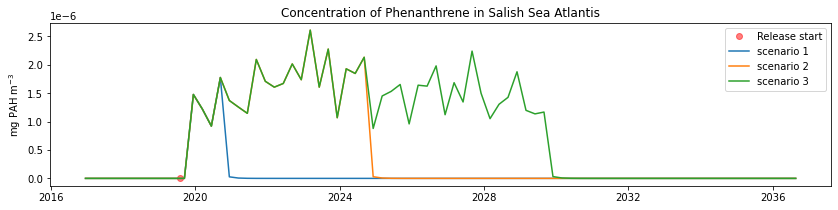

In [8]:
splot.compare_pah('Phenanthrene', scenarios, time, start, end, event_start)

Lower trophic levels

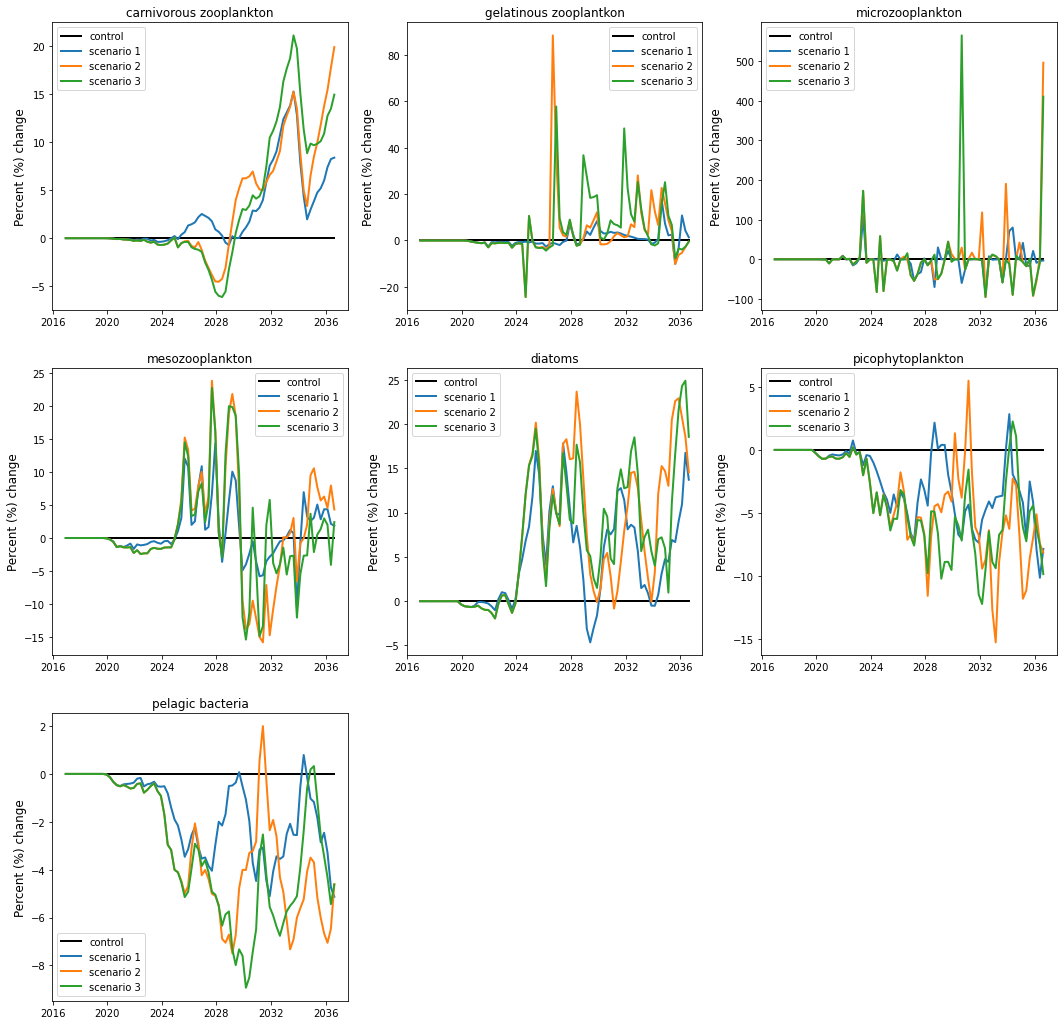

In [9]:
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end, y_min=None, y_max=None)

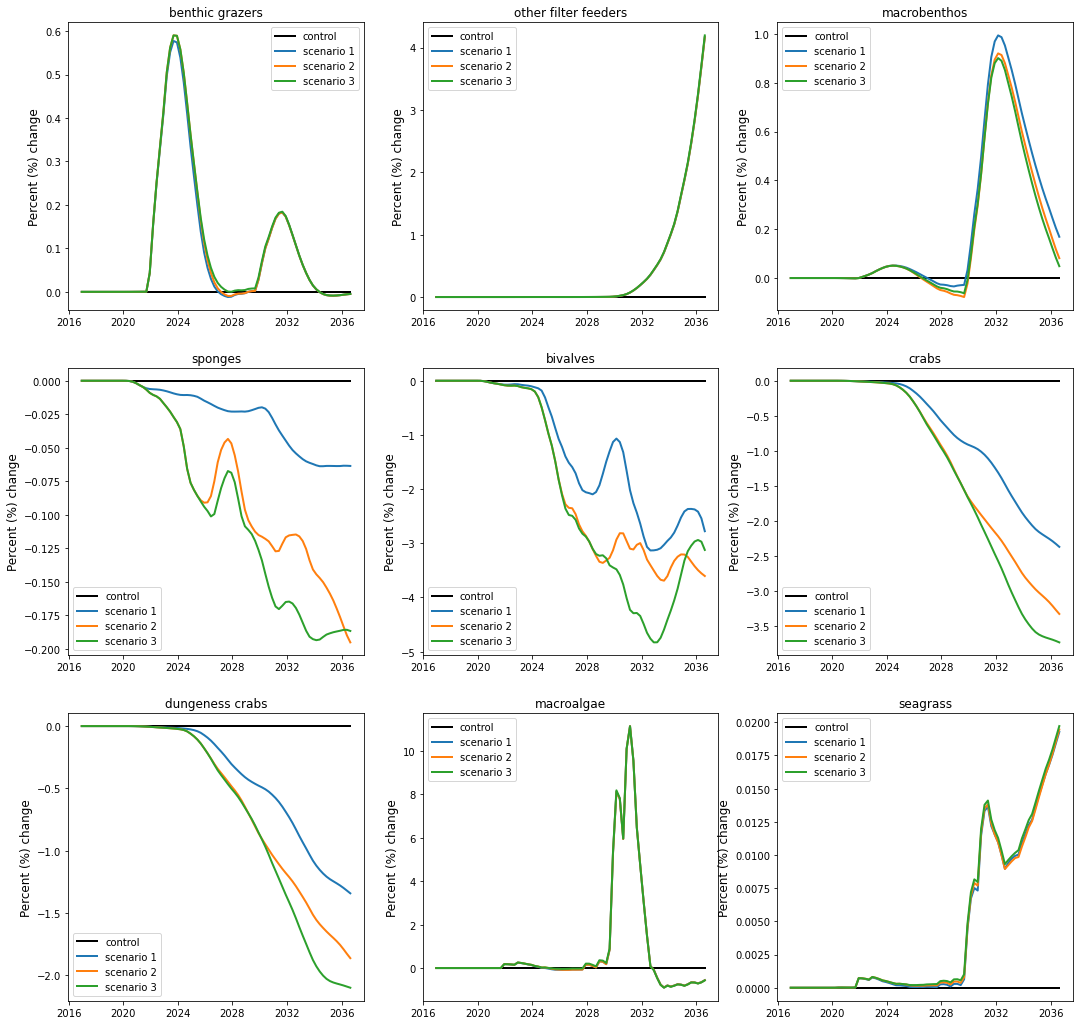

In [10]:
splot.benthic_compare_scenarios(groups.benthos, scenarios, control,time, start, end, y_min=None, y_max=None)

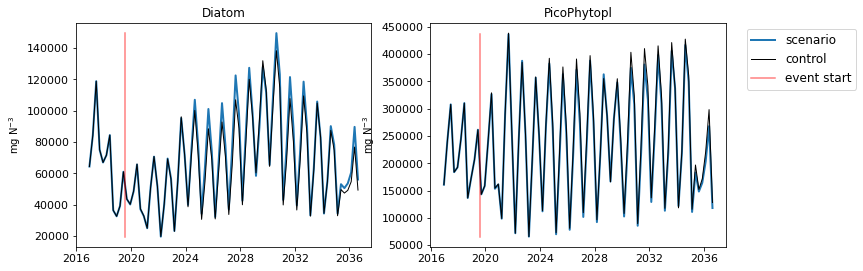

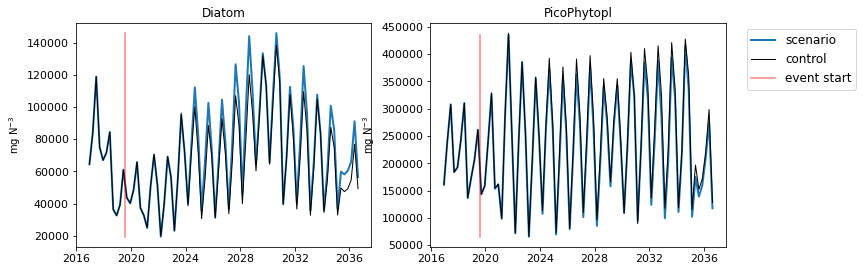

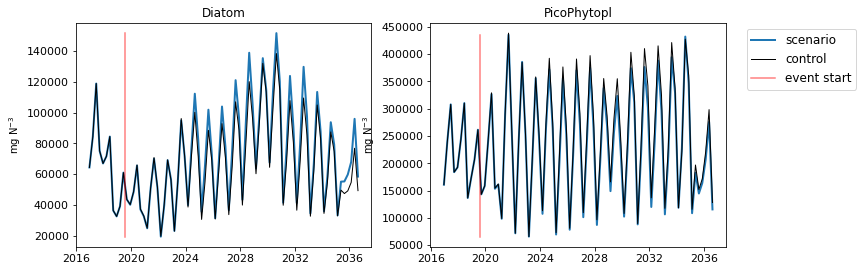

In [26]:
for scenario in scenarios:
    splot.plot_pelagic_biomass(groups.phytoplankton, scenario, control, time, start, end, event_start)

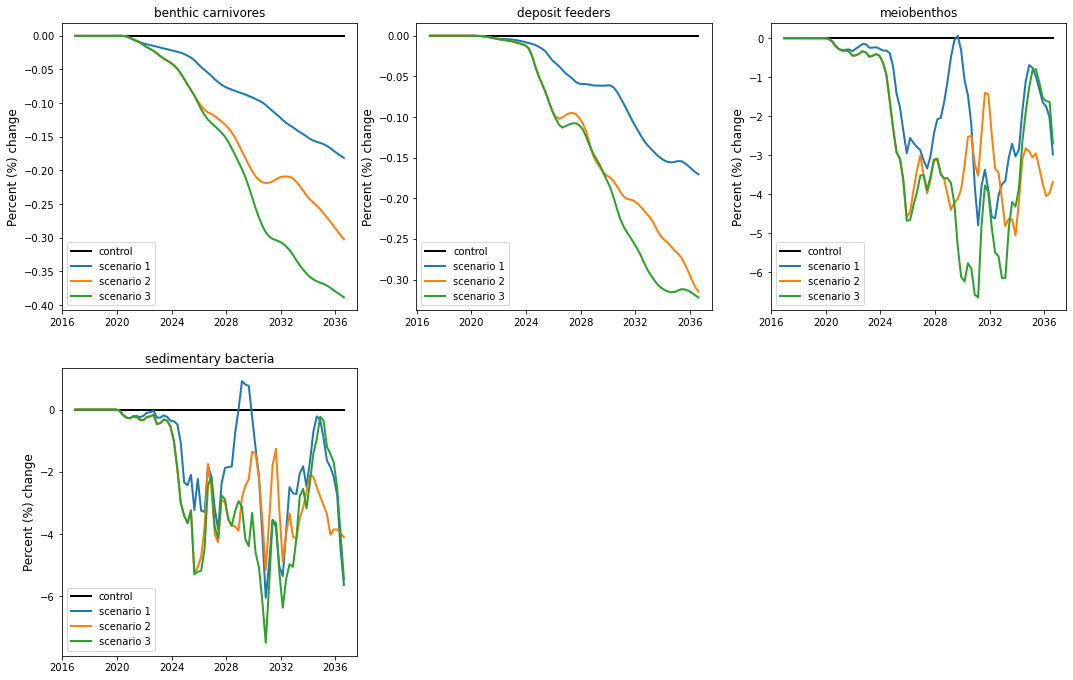

In [13]:
splot.sediment_compare_scenarios(groups.sediment_feeders, scenarios, control, time, start, end)


Years 2019-2029

In [14]:
end2029 =  91 #t.size-1 # numpy.datetime64('2029-08-29T14:00:00.000000000')

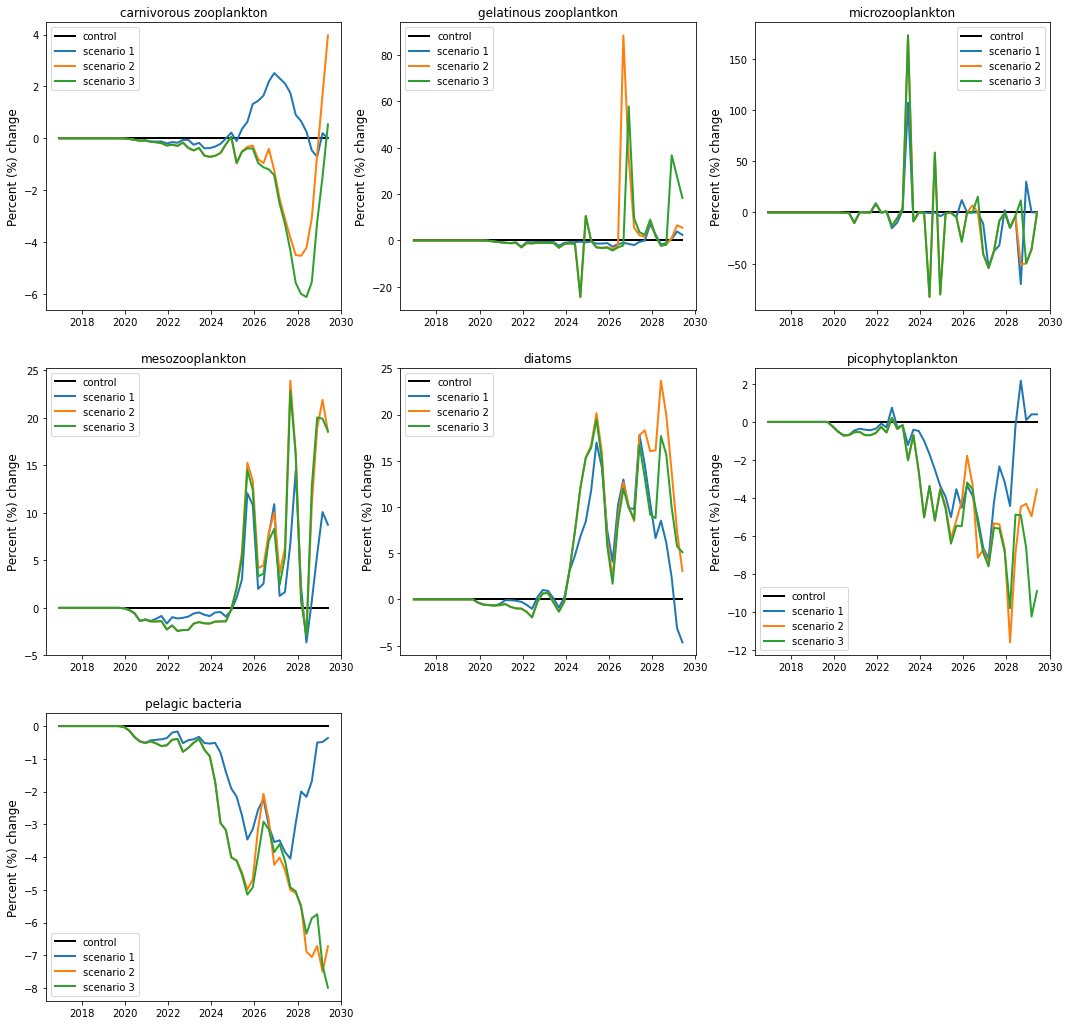

In [15]:
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end2029, y_min=None, y_max=None)

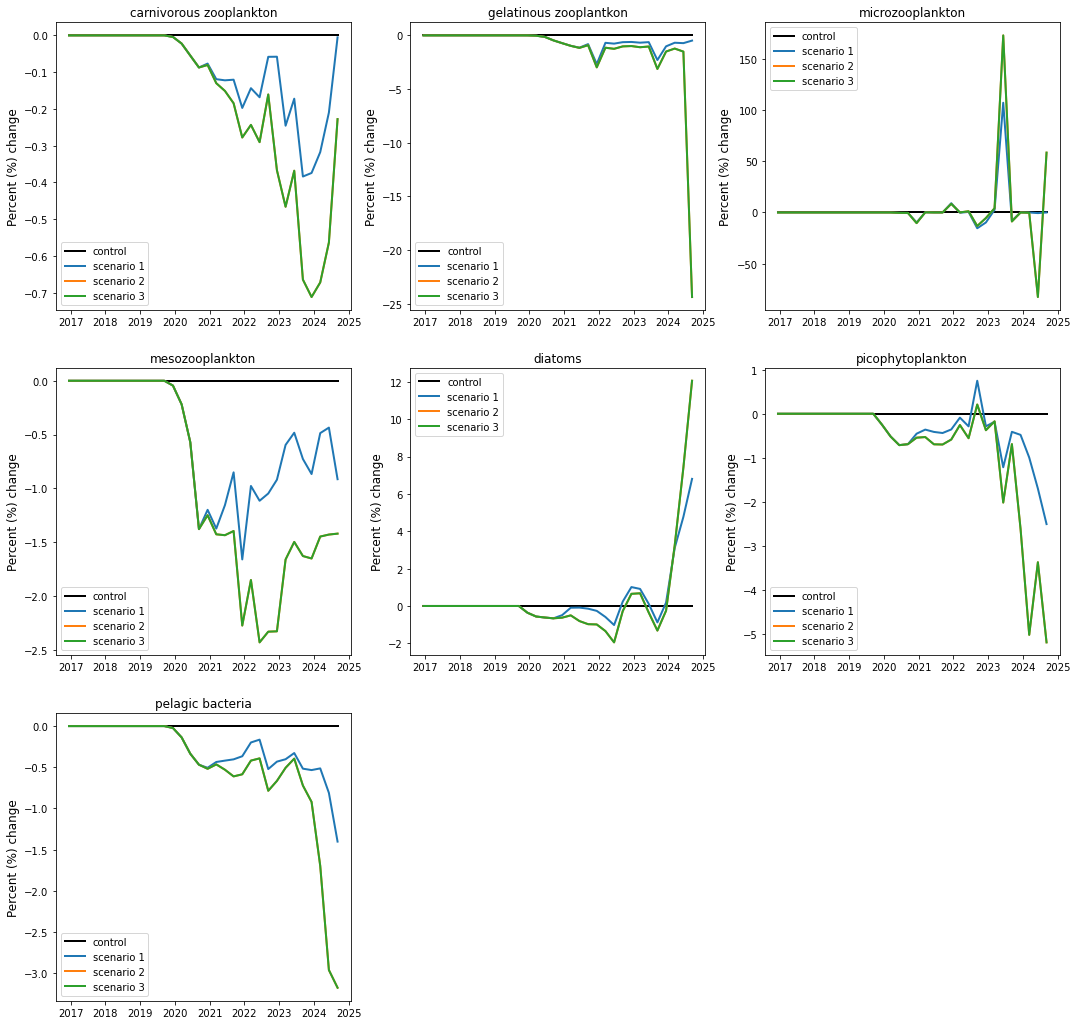

In [16]:
end2024 =  72 #t.size-1
splot.pelagic_compare_scenarios(groups.plankton, scenarios, control, time, start, end2024)

In [17]:
print(time[55], time[75], time[95], time[220] )

2020-09-09T14:00:00.000000000 2025-09-03T14:00:00.000000000 2030-08-28T14:00:00.000000000 2061-10-19T14:00:00.000000000


In [18]:
days = [55, 75, 95, 220]
data = {'initial year of discharge': [], '5 years later': [],'10 years later': [], '50 years later': []}

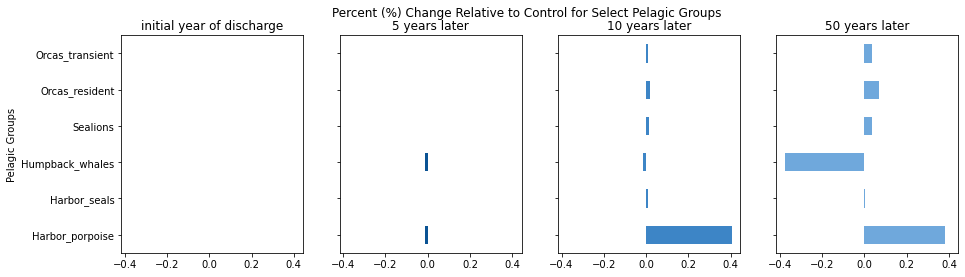

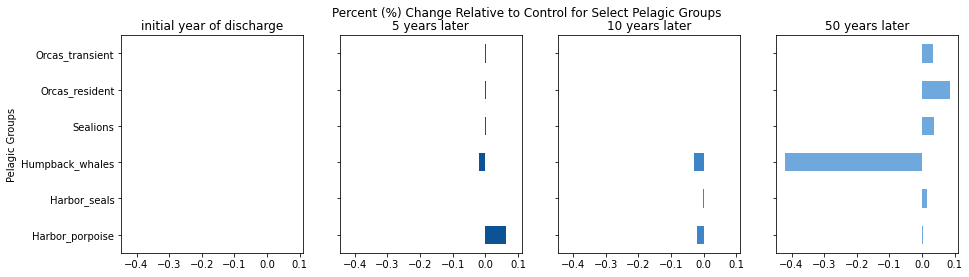

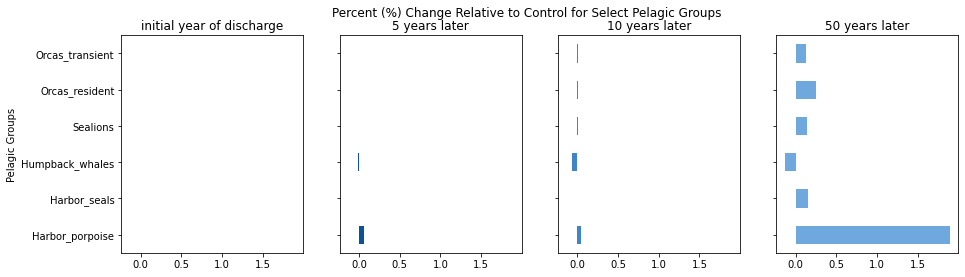

In [20]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.mammals,scenario,control,days,data)

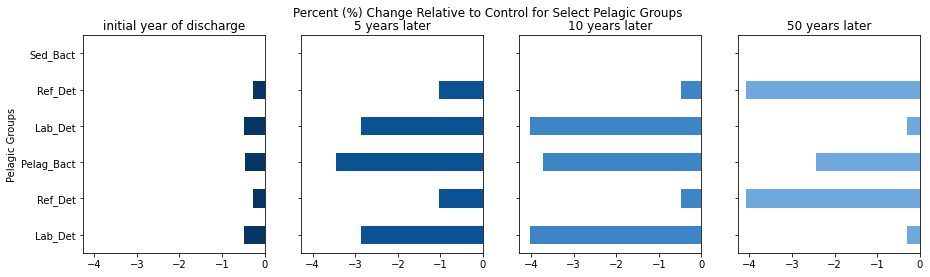

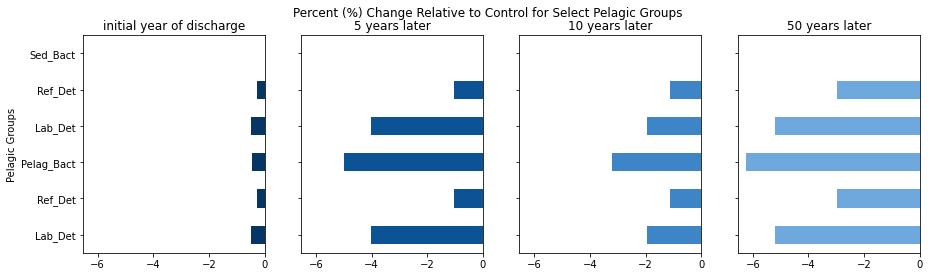

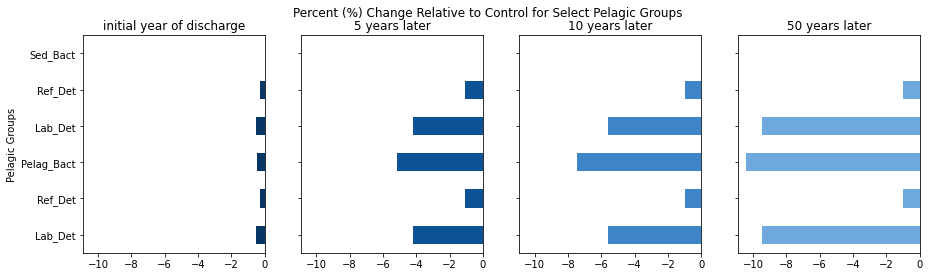

In [21]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.bacteria, scenario, control, days, data)

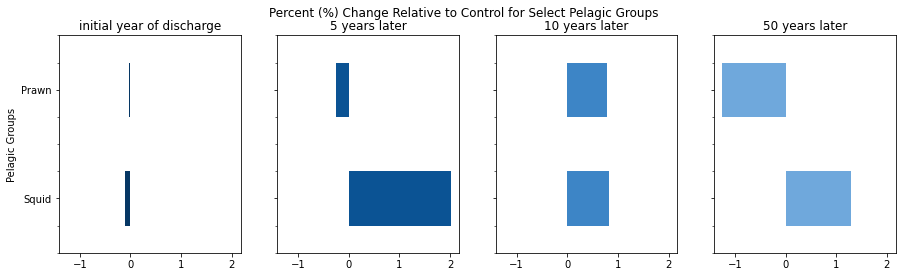

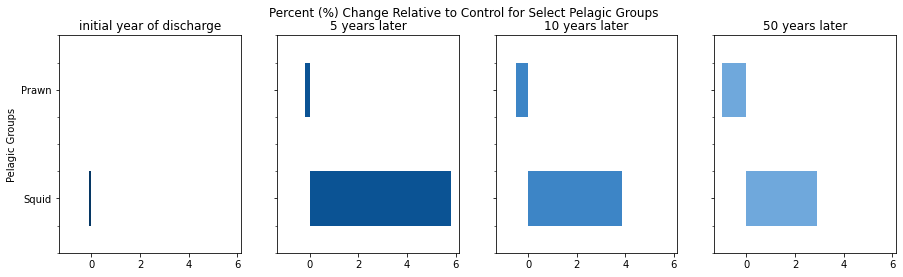

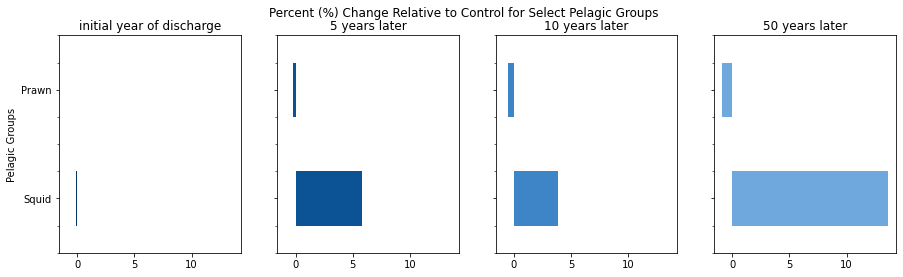

In [23]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.pelagic_invertebrates, scenario, control, days, data)

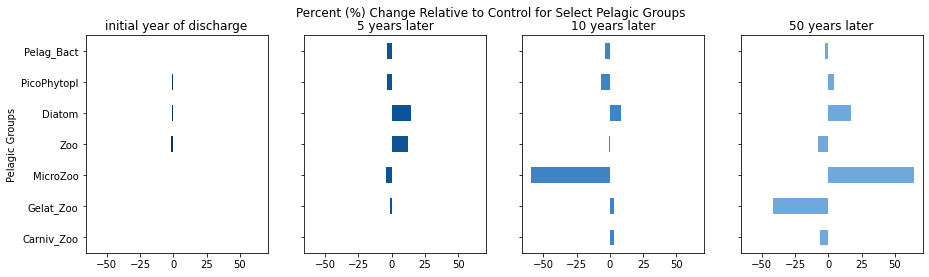

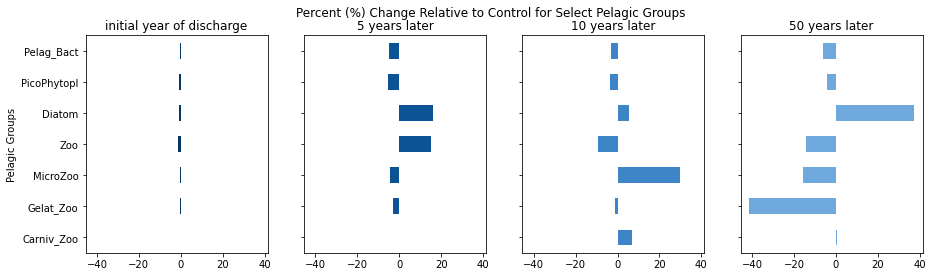

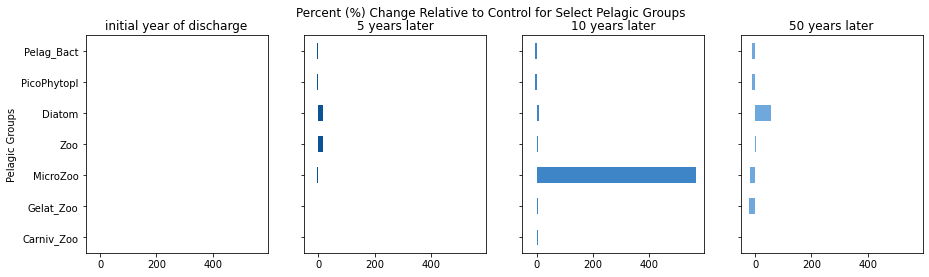

In [24]:
for scenario in scenarios:
    splot.boxplot_pelagic(groups.plankton, scenario, control, days, data)

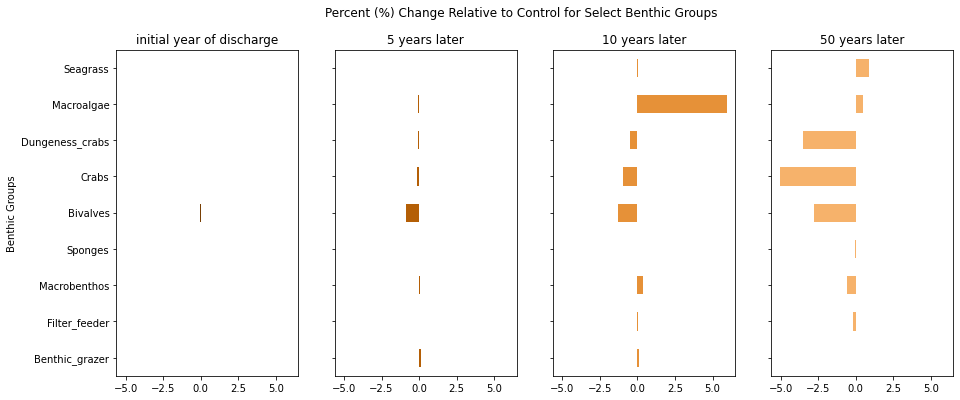

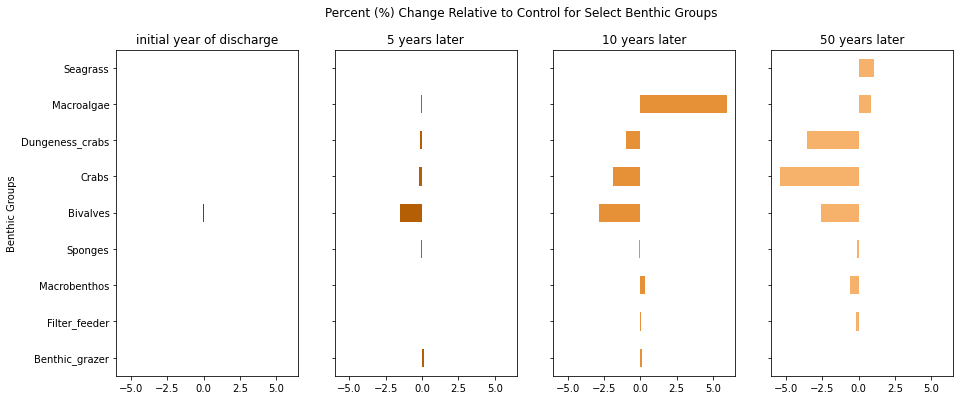

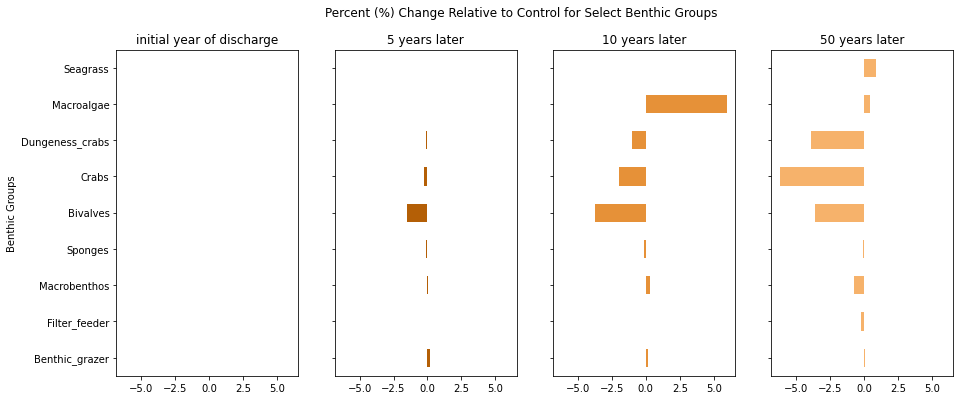

In [25]:
for scenario in scenarios:
    splot.boxplot_benthic(groups.benthos, scenario, control, days, data)